In [248]:
#import important liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [249]:
#loading dataset
data=pd.read_csv(r"E:\used_cars_price.csv")

In [250]:
data

company         model  year_car    km_car fuel_type  \
0            ['Maruti']      ['Ciaz']      2016  1,36,776    Diesel   
1            ['Maruti']      ['Ciaz']      2015    97,767    Petrol   
2            ['Maruti']     ['Swift']      2014  1,13,711    Diesel   
3              ['Ford']  ['Ecosport']      2016    85,902    Diesel   
4            ['Maruti']      ['Ciaz']      2018    43,853    Petrol   
...                 ...           ...       ...       ...       ...   
5815        ['Hyundai']     ['Creta']      2017    39,000    Petrol   
5816         ['Maruti']    ['Vitara']      2019    19,000    Diesel   
5817           ['Ford']  ['Ecosport']      2016    24,000    Petrol   
5818         ['Toyota']     ['Etios']      2011    54,213    Petrol   
5819  ['Mercedes-Benz']   ['E-Class']      2010    38,000    Petrol   

           spec   location  price_car_inlakh  
0        Manual  New Delhi              5.21  
1     Automatic  New Delhi              5.58  
2        Manual  New Delhi              4.64  
3        Manual  New Delhi              5.86  
4        Manual  New Delhi              7.59  
...         ...        ...               ...  
5815     Manual     Mumbai              8.95  
5816  Automatic     Mumbai             10.50  
5817  Automatic     Mumbai              7.16  
5818     Manual     Mumbai              3.25  
5819  Automatic     Mumbai             11.99  

[5820 rows x 8 columns]

In [251]:
df=data.copy()

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           5820 non-null   object 
 1   model             5820 non-null   object 
 2   year_car          5820 non-null   int64  
 3   km_car            5820 non-null   object 
 4   fuel_type         5820 non-null   object 
 5   spec              5820 non-null   object 
 6   location          5820 non-null   object 
 7   price_car_inlakh  5820 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 363.9+ KB


In [253]:
# converting data into proper form
data['km_car']=data['km_car'].str.replace(',','')

In [254]:
#converting data column into integer data type
data['km_car']=data['km_car'].astype(int)

In [255]:
data['fuel_type'].unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG', 'El'], dtype=object)

In [256]:
#converting categorical data into numerical form
data['fuel_type']=data['fuel_type'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'El':4})

In [257]:
data['spec'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [258]:
#converting categorical data into numerical form
data['spec']=data['spec'].replace({'Manual':0,'Automatic':1})

In [259]:
data['location'].unique()

array(['New Delhi', 'Bangalore', 'Mumbai'], dtype=object)

In [260]:
##converting categorical data into numerical form
data['location']=data['location'].replace({'New Delhi':0,'Bangalore':1,'Mumbai':2})

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           5820 non-null   object 
 1   model             5820 non-null   object 
 2   year_car          5820 non-null   int64  
 3   km_car            5820 non-null   int32  
 4   fuel_type         5820 non-null   int64  
 5   spec              5820 non-null   int64  
 6   location          5820 non-null   int64  
 7   price_car_inlakh  5820 non-null   float64
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 341.1+ KB


In [262]:
data.shape

(5820, 8)

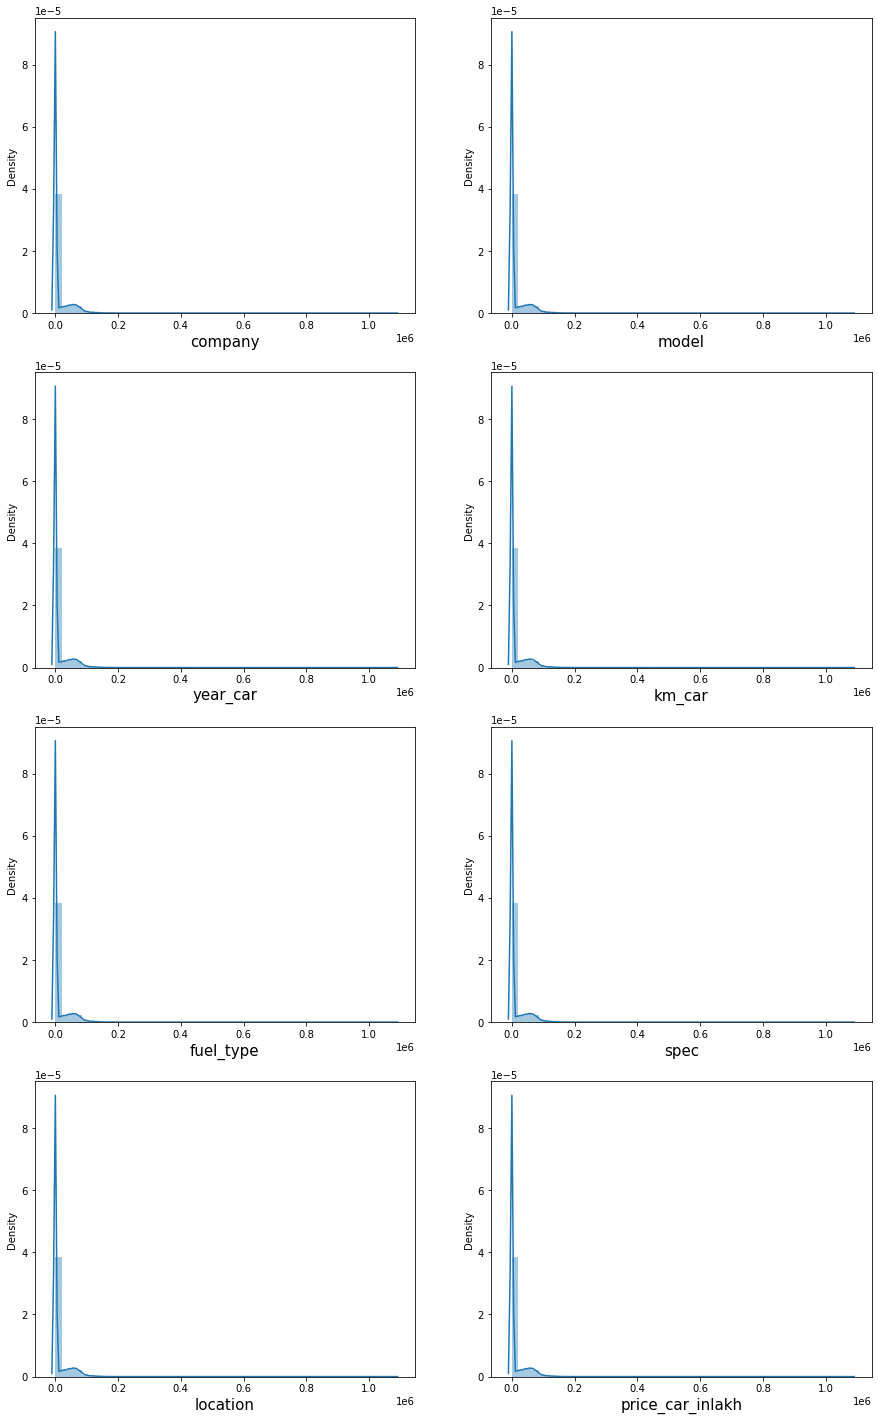

In [263]:
# data visualization 
plt.figure(figsize=(15,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.distplot(data.iloc[:,3:])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

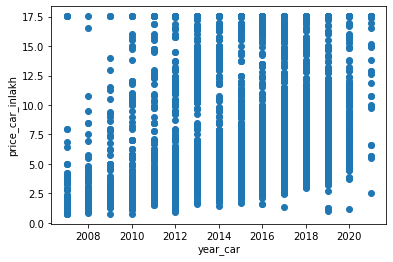

In [306]:
plt.scatter(data['year_car'],data['price_car_inlakh'])
plt.xlabel('year_car')
plt.ylabel('price_car_inlakh')
plt.show()

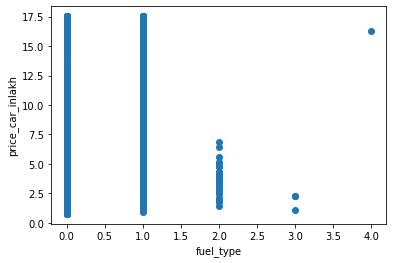

In [302]:
plt.scatter(data['fuel_type'],data['price_car_inlakh'])
plt.xlabel('fuel_type')
plt.ylabel('price_car_inlakh')
plt.show()

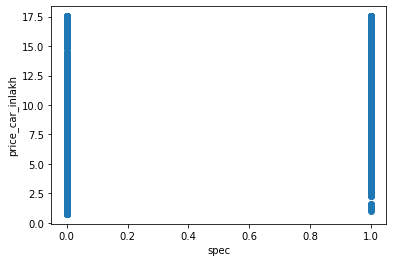

In [303]:
plt.scatter(data['spec'],data['price_car_inlakh'])
plt.xlabel('spec')
plt.ylabel('price_car_inlakh')
plt.show()

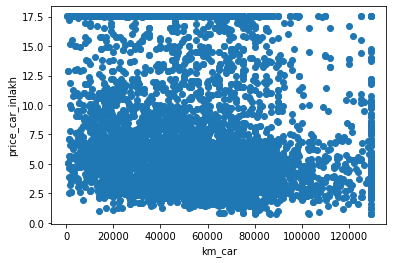

In [304]:
plt.scatter(data['km_car'],data['price_car_inlakh'])
plt.xlabel('km_car')
plt.ylabel('price_car_inlakh')
plt.show()

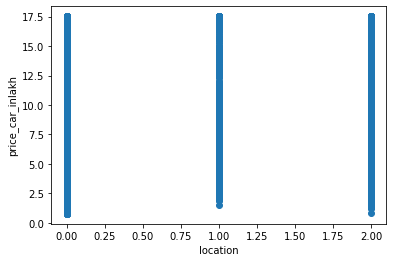

In [305]:
plt.scatter(data['location'],data['price_car_inlakh'])
plt.xlabel('location')
plt.ylabel('price_car_inlakh')
plt.show()

In [264]:
data.skew()

year_car           -0.471437
km_car              8.948667
fuel_type           0.530385
spec                0.809033
location            0.551649
price_car_inlakh    3.521796
dtype: float64

In [265]:
# as from the above it seems that km_car column is skewed

<AxesSubplot:xlabel='year_car'>

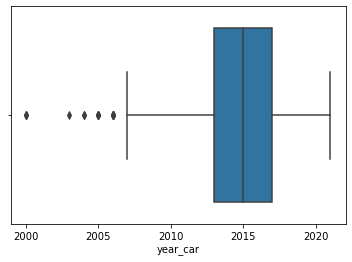

In [266]:
# outlier detection using box plot and it has outlier in the column
sns.boxplot(data['year_car'])

In [267]:
# removing of outlier using iqr method(caping technique)
Q1=data['year_car'].quantile(.25)
Q3=data['year_car'].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [268]:
data['year_car']=np.where(data['year_car']>upper_limit,upper_limit,
                              np.where(data['year_car']<lower_limit,
                                       lower_limit,
                              data['year_car'])
                             )

<AxesSubplot:xlabel='year_car'>

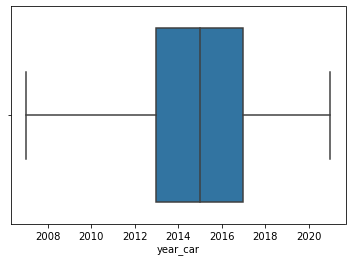

In [269]:
sns.boxplot(data['year_car'])

<AxesSubplot:xlabel='km_car'>

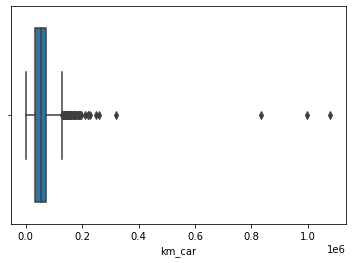

In [270]:
# outlier detection using box plot and it has outlier in the column
sns.boxplot(data['km_car'])

In [271]:
# removing of outlier using iqr method(caping technique)
Q1=data['km_car'].quantile(.25)
Q3=data['km_car'].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [272]:
data['km_car']=np.where(data['km_car']>upper_limit,upper_limit,
                              np.where(data['km_car']<lower_limit,
                                       lower_limit,
                              data['km_car'])
                             )

<AxesSubplot:xlabel='km_car'>

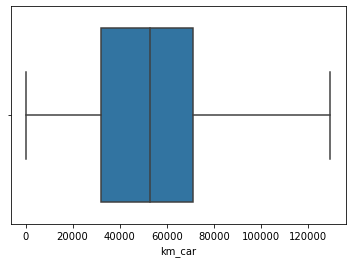

In [273]:
sns.boxplot(data['km_car'])

<AxesSubplot:xlabel='fuel_type'>

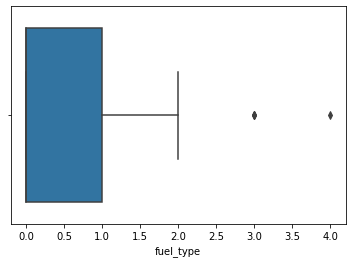

In [274]:
# outlier detection using box plot and it has outlier in the column
sns.boxplot(data['fuel_type'])

<AxesSubplot:xlabel='spec'>

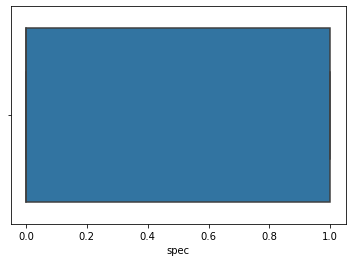

In [275]:
sns.boxplot(data['spec'])

<AxesSubplot:xlabel='price_car_inlakh'>

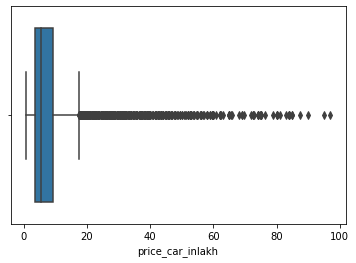

In [276]:
# outlier detection using box plot and it has outlier in the column
sns.boxplot(data['price_car_inlakh'])

In [277]:
# removing of outlier using iqr method(caping technique)
Q1=data['price_car_inlakh'].quantile(.25)
Q3=data['price_car_inlakh'].quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [278]:
data['price_car_inlakh']=np.where(data['price_car_inlakh']>upper_limit,upper_limit,
                              np.where(data['price_car_inlakh']<lower_limit,
                                       lower_limit,
                              data['price_car_inlakh'])
                             )

<AxesSubplot:xlabel='price_car_inlakh'>

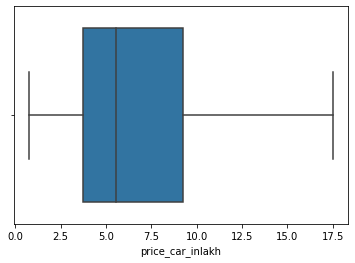

In [279]:
sns.boxplot(data['price_car_inlakh'])

In [280]:
# after removing outlier there is no skewness in data
data.skew()

year_car           -0.391232
km_car              0.465289
fuel_type           0.530385
spec                0.809033
location            0.551649
price_car_inlakh    1.075388
dtype: float64

<AxesSubplot:xlabel='company', ylabel='count'>

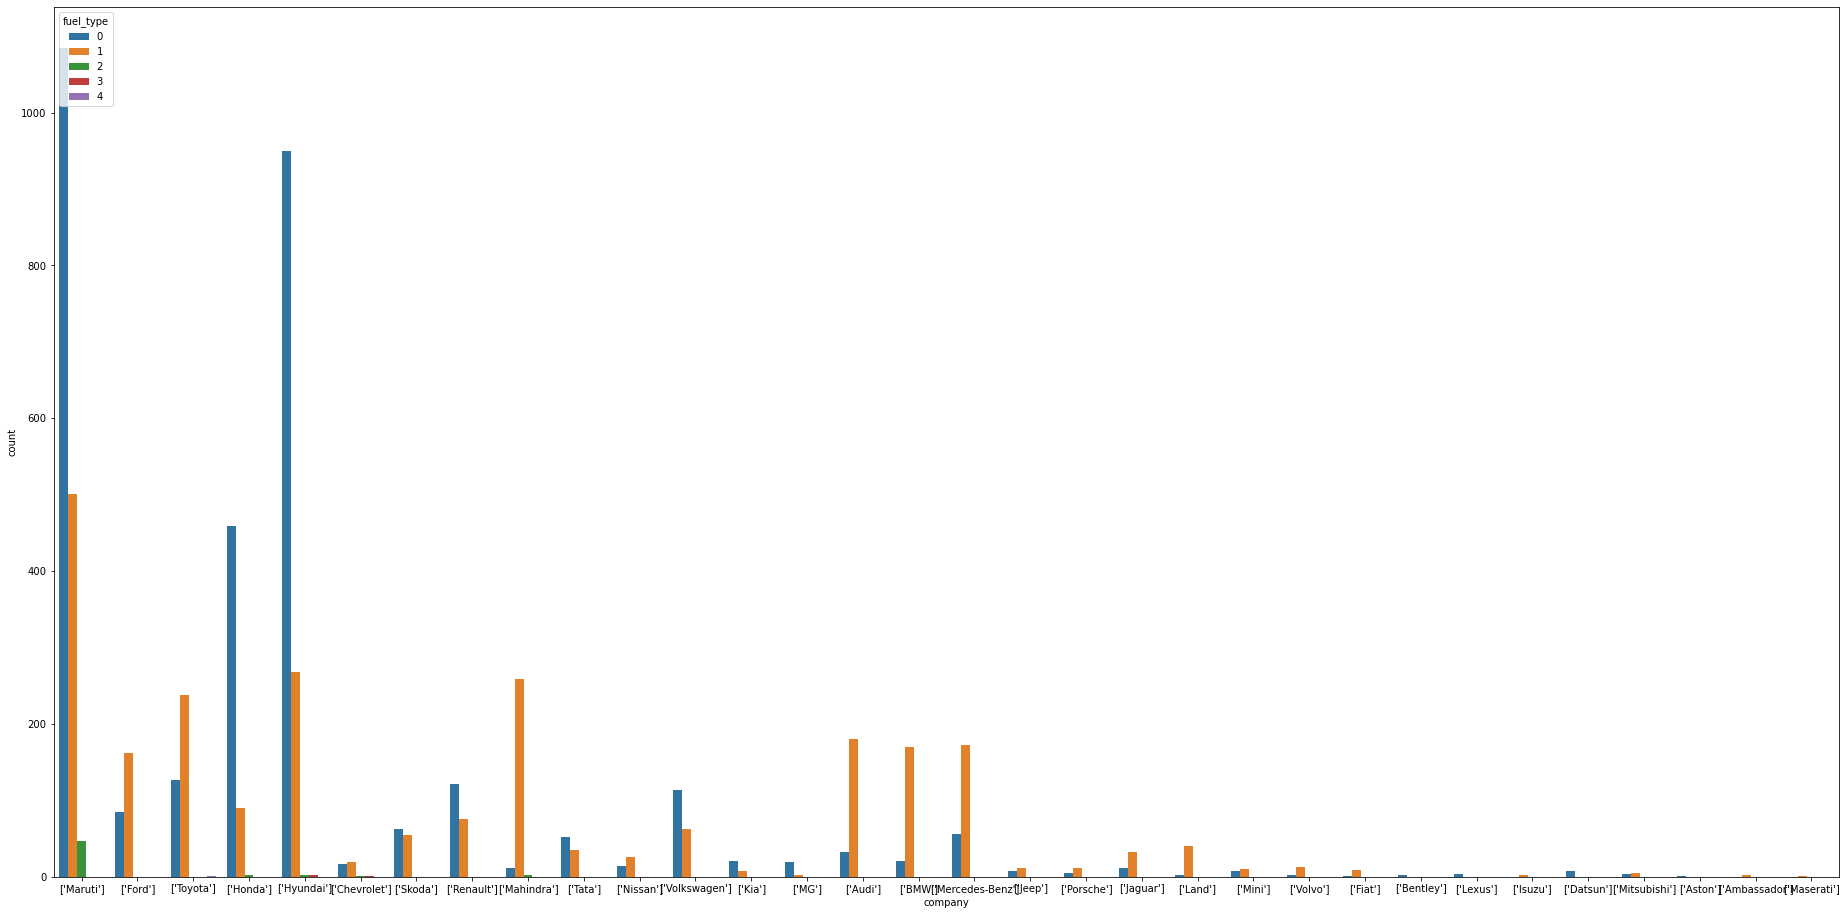

In [281]:
plt.figure(figsize=(32,16))
sns.countplot('company',hue='fuel_type',data=data)
#from the graph it shows that highest number of maruti car in petrol fuel type available in market

<AxesSubplot:xlabel='location', ylabel='count'>

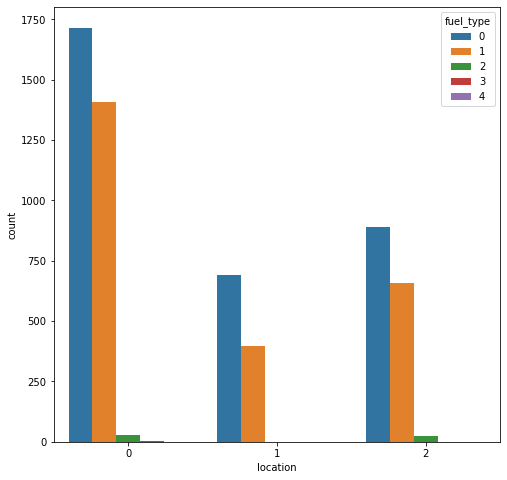

In [282]:
plt.figure(figsize=(8,8))
sns.countplot('location',hue='fuel_type',data=data)
# from the graph it shows that highest number of used cars available in delhi location 

<AxesSubplot:xlabel='year_car', ylabel='count'>

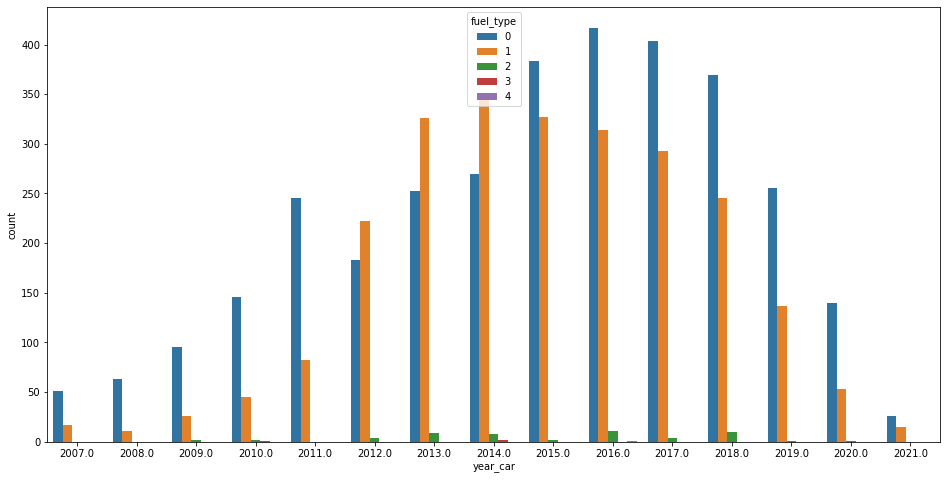

In [283]:
plt.figure(figsize=(16,8))
sns.countplot('year_car',hue='fuel_type',data=data)
#from the graph it shows that highest number of used cars available of purchase year 2016

<AxesSubplot:xlabel='spec', ylabel='count'>

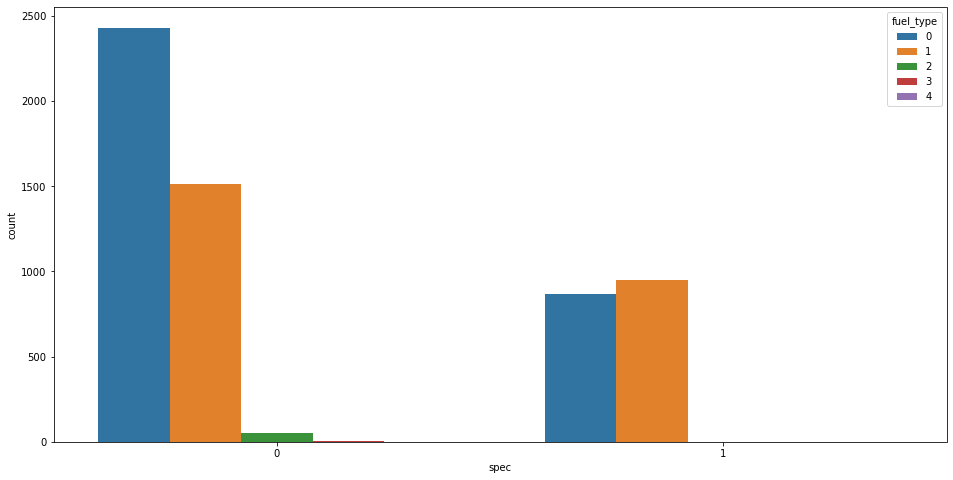

In [284]:
plt.figure(figsize=(16,8))
sns.countplot('spec',hue='fuel_type',data=data)
#from the graph it shows that highest number of used cars available whose specification is Manual

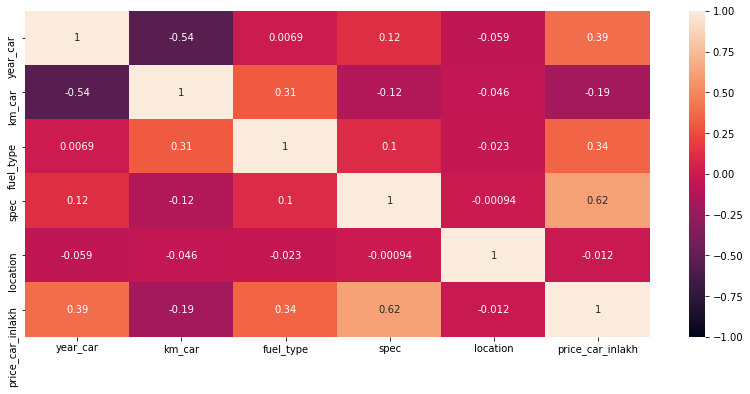

In [285]:
#coorelation matrix
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [286]:
# scaling of data
from sklearn.preprocessing import StandardScaler

In [287]:
scaler=StandardScaler()

In [288]:
# converting of categorical data into numerical form by using dummy method
df_dummy=pd.get_dummies(data,columns=['company','model'],drop_first=True)

In [289]:
# dropping of duplicate column
df_dummy.drop(columns=['price_car_inlakh'],axis=1,inplace=True)

In [290]:
# concating of original and dummy data
data1=pd.concat([data,df_dummy],axis=1)

In [291]:
data1

company         model  year_car    km_car  fuel_type  spec  \
0            ['Maruti']      ['Ciaz']    2016.0  129485.0          1     0   
1            ['Maruti']      ['Ciaz']    2015.0   97767.0          0     1   
2            ['Maruti']     ['Swift']    2014.0  113711.0          1     0   
3              ['Ford']  ['Ecosport']    2016.0   85902.0          1     0   
4            ['Maruti']      ['Ciaz']    2018.0   43853.0          0     0   
...                 ...           ...       ...       ...        ...   ...   
5815        ['Hyundai']     ['Creta']    2017.0   39000.0          0     0   
5816         ['Maruti']    ['Vitara']    2019.0   19000.0          1     1   
5817           ['Ford']  ['Ecosport']    2016.0   24000.0          0     1   
5818         ['Toyota']     ['Etios']    2011.0   54213.0          0     0   
5819  ['Mercedes-Benz']   ['E-Class']    2010.0   38000.0          0     1   

      location  price_car_inlakh  year_car    km_car  fuel_type  spec  \
0            0              5.21    2016.0  129485.0          1     0   
1            0              5.58    2015.0   97767.0          0     1   
2            0              4.64    2014.0  113711.0          1     0   
3            0              5.86    2016.0   85902.0          1     0   
4            0              7.59    2018.0   43853.0          0     0   
...        ...               ...       ...       ...        ...   ...   
5815         2              8.95    2017.0   39000.0          0     0   
5816         2             10.50    2019.0   19000.0          1     1   
5817         2              7.16    2016.0   24000.0          0     1   
5818         2              3.25    2011.0   54213.0          0     0   
5819         2             11.99    2010.0   38000.0          0     1   

      location  company_['Aston']  company_['Audi']  company_['BMW']  \
0            0                  0                 0                0   
1            0                  0                 0                0   
2            0                  0                 0                0   
3            0                  0                 0                0   
4            0                  0                 0                0   
...        ...                ...               ...              ...   
5815         2                  0                 0                0   
5816         2                  0                 0                0   
5817         2                  0                 0                0   
5818         2                  0                 0                0   
5819         2                  0                 0                0   

      company_['Bentley']  company_['Chevrolet']  company_['Datsun']  \
0                       0                      0                   0   
1                       0                      0                   0   
2                       0                      0                   0   
3                       0                      0                   0   
4                       0                      0                   0   
...                   ...                    ...                 ...   
5815                    0                      0                   0   
5816                    0                      0                   0   
5817                    0                      0                   0   
5818                    0                      0                   0   
5819                    0                      0                   0   

      company_['Fiat']  company_['Ford']  company_['Honda']  \
0                    0                 0                  0   
1                    0                 0                  0   
2                    0                 0                  0   
3                    0                 1                  0   
4                    0                 0                  0   
...                ...               ...                ...   
5815                 0         

In [292]:
# dropping of categorical non numeric column
final_data=data1.drop(['company','model'],axis=1)
final_data

year_car    km_car  fuel_type  spec  location  price_car_inlakh  \
0       2016.0  129485.0          1     0         0              5.21   
1       2015.0   97767.0          0     1         0              5.58   
2       2014.0  113711.0          1     0         0              4.64   
3       2016.0   85902.0          1     0         0              5.86   
4       2018.0   43853.0          0     0         0              7.59   
...        ...       ...        ...   ...       ...               ...   
5815    2017.0   39000.0          0     0         2              8.95   
5816    2019.0   19000.0          1     1         2             10.50   
5817    2016.0   24000.0          0     1         2              7.16   
5818    2011.0   54213.0          0     0         2              3.25   
5819    2010.0   38000.0          0     1         2             11.99   

      year_car    km_car  fuel_type  spec  location  company_['Aston']  \
0       2016.0  129485.0          1     0         0                  0   
1       2015.0   97767.0          0     1         0                  0   
2       2014.0  113711.0          1     0         0                  0   
3       2016.0   85902.0          1     0         0                  0   
4       2018.0   43853.0          0     0         0                  0   
...        ...       ...        ...   ...       ...                ...   
5815    2017.0   39000.0          0     0         2                  0   
5816    2019.0   19000.0          1     1         2                  0   
5817    2016.0   24000.0          0     1         2                  0   
5818    2011.0   54213.0          0     0         2                  0   
5819    2010.0   38000.0          0     1         2                  0   

      company_['Audi']  company_['BMW']  company_['Bentley']  \
0                    0                0                    0   
1                    0                0                    0   
2                    0                0                    0   
3                    0                0                    0   
4                    0                0                    0   
...                ...              ...                  ...   
5815                 0                0                    0   
5816                 0                0                    0   
5817                 0                0                    0   
5818                 0                0                    0   
5819                 0                0                    0   

      company_['Chevrolet']  company_['Datsun']  company_['Fiat']  \
0                         0                   0                 0   
1                         0                   0                 0   
2                         0                   0                 0   
3                         0                   0                 0   
4                         0                   0                 0   
...                     ...                 ...               ...   
5815                      0                   0                 0   
5816                      0                   0                 0   
5817                      0                   0                 0   
5818                      0                   0                 0   
5819                      0                   0                 0   

      company_['Ford']  company_['Honda']  company_['Hyundai']  \
0                    0                  0                    0   
1                    0                  0                    0   
2                    0                  0                    0   
3                    1                  0                    0   
4                    0                  0                    0   
...                ...                ...                  ...   
5815                 0                  0                    1   
5816                 0                  0                    0   
5817                 1                  0       

In [317]:
#spiliting of data into independent and dependent variable
x=final_data.drop(columns='price_car_inlakh')
y=final_data['price_car_inlakh']

In [318]:
x=scaler.fit_transform(x)

In [319]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [320]:
from sklearn.linear_model import LinearRegression

In [321]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [322]:
lr=LinearRegression()

In [323]:
lr.fit(x_train,y_train)

LinearRegression()

In [324]:
lr.score(x_train,y_train)

0.9165841635143736

In [325]:
lr.score(x_test,y_test)

-7.760313406546909e+25

In [326]:
lr_pred=lr.predict(x_test)

In [327]:
mean_absolute_error(y_test,lr_pred)

3566200199903.971

In [328]:
mean_squared_error(y_test,lr_pred)

1.865401685597873e+27

In [329]:
r2_score(y_test,lr_pred)

-7.760313406546909e+25

In [330]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [331]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

8723775258863.389

In [332]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

1.0273859594624312e+28

In [333]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

5.360498324535534e+26

In [334]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [335]:
lasso_reg.score(x_train,y_train)

0.0

In [336]:
lasso_reg.score(x_test,y_test)

-5.5519036363138596e-05

In [337]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [338]:
ridge_reg.score(x_train,y_train)

0.9170755279507841

In [339]:
ridge_reg.score(x_test,y_test)

0.8844516247685914

In [340]:
ridge_pred=ridge_reg.predict(x_test)

In [341]:
r2_score(y_test,ridge_pred)

0.8844516247685914

In [342]:
from sklearn.neighbors import KNeighborsRegressor

In [343]:
knn=KNeighborsRegressor()

In [344]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [345]:
knn.score(x_train,y_train)

0.9356988588781828

In [346]:
knn.score(x_test,y_test)

0.8778318109251911

In [347]:
knn_pred=knn.predict(x_test)

In [348]:
mean_absolute_error(y_test,knn_pred)

0.8752024054982819

In [349]:
mean_squared_error(y_test,knn_pred)

2.936643584965636

In [350]:
r2_score(y_test,knn_pred)

0.8778318109251911

In [351]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

1.0655106958762888

In [352]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

3.760293683923969

In [353]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='r2')
knn_score_n=-lin_score
np.mean(knn_score_n)

-0.836173625198019

In [354]:
from sklearn.tree import DecisionTreeRegressor

In [355]:
dt=DecisionTreeRegressor()

In [356]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [357]:
dt.score(x_train,y_train)

0.9998299907797129

In [358]:
dt.score(x_test,y_test)

0.8879100760085542

In [359]:
dt_pred=dt.predict(x_test)

In [360]:
mean_absolute_error(y_test,dt_pred)

0.7271586074292261

In [361]:
mean_squared_error(y_test,dt_pred)

2.694385164596337

In [362]:
r2_score(y_test,dt_pred)

0.8879100760085542

In [363]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

1.0795046534936998

In [364]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

4.143933517176164

In [365]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='r2')
dt_score_n=-lin_score
np.mean(dt_score_n)

-0.8101568078445697

In [366]:
from sklearn.ensemble import RandomForestRegressor

In [367]:
rf=RandomForestRegressor()

In [368]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [369]:
rf.score(x_train,y_train)

0.9892973357482282

In [370]:
rf.score(x_test,y_test)

0.9148790583481565

In [371]:
rf_pred=rf.predict(x_test)

In [372]:
mean_absolute_error(y_test,rf_pred)

0.7071337258849872

In [373]:
mean_squared_error(y_test,rf_pred)

2.046112569410791

In [374]:
r2_score(y_test,rf_pred)

0.9148790583481565

In [375]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

0.9230500409690119

In [376]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

2.6507030782814165

In [377]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
rf_score_n=-lin_score
np.mean(rf_score_n)

-0.86905771160108

In [383]:
# from the above metrics evaluation it came to conclusion that only r2 metrics score of ridge regression is better amongst all other regression.
# therefore,Ridge is the best algorithm